In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, plot_roc_curve
from sklearn.metrics import make_scorer, balanced_accuracy_score, classification_report
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
def print_metrics(y_test, y_pred, model, X_test):
    matrix = confusion_matrix(y_test, y_pred)

    tn = matrix[0, 0]
    tp = matrix[1, 1]
    fn = matrix[1, 0]
    fp = matrix[0, 1]

    tpr = tp / (tp + fn)
    tnr = tn / (tn + fp)

    print('accuracy =', balanced_accuracy_score(y_test, y_pred),
          '\nTPR =', tpr,
          '\nTNR =', tnr, '\n')

    print(classification_report(y_test, y_pred))

    plot_roc_curve(model, X_test, y_test)
    plt.plot(1 - tpr, tnr, "x", c="red")
    plt.show()

# 1 

G = 2p1p2 = 2p1(1 - p1)  

G' = -2p1 + 2 - 2p1 = 2 - 4p1  

4p1 = 2  

p1 = 0.5 => p2 = 1 - p1 = 0.5  

p1 = 0.5, p2 = 0.5  

# 2 

высота от log2(N) до N

# 3 

In [3]:
path = 'https://raw.githubusercontent.com/s-a-nersisyan/HSE_bioinformatics_2021/master/seminar17/BRCA_pam50.tsv'
data = pd.read_csv(path, sep='\t', index_col=0)
X = data.iloc[:, :-1].to_numpy()
y = data["Subtype"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                  stratify=y, test_size=0.2, random_state=13)

In [4]:
model = RandomForestClassifier()
params = {'n_estimators': [10, 50, 100],
          'max_depth': [5, 9],
          'class_weight': ["balanced"],
          'random_state': [13]}
grid = GridSearchCV(model, params,
                   scoring=make_scorer(balanced_accuracy_score), 
                   n_jobs=-1,
                   cv=RepeatedStratifiedKFold(n_repeats=10))
grid.fit(X, y)
print(grid.best_params_)
y_pred = grid.predict(X_test)
round(balanced_accuracy_score(y_pred, y_test), 3)

{'class_weight': 'balanced', 'max_depth': 5, 'n_estimators': 100, 'random_state': 13}


0.967

# 4 

In [5]:
ann = pd.read_pickle('bc_ann.pkl')
ann.head()

,Class,Dataset,Dataset type
GSM107072,1,GSE1456,Validation
GSM107073,0,GSE1456,Validation
GSM107074,0,GSE1456,Validation
GSM107075,0,GSE1456,Validation
GSM107076,0,GSE1456,Validation


In [6]:
data = pd.read_pickle('bc_data.pkl')
data.head()

,A1CF,A2M,AACS,AAGAB,AAK1,AAMDC,AAMP,AARS1,AASDHPPT,AATF,...,ZRSR2,ZSCAN18,ZSCAN31,ZSCAN32,ZSWIM8,ZW10,ZWILCH,ZWINT,ZYX,ZZEF1
GSM107072,6.171391,10.848897,7.777530,7.606607,6.394179,7.144505,8.254429,9.353714,8.054501,8.665148,...,7.822262,6.745400,5.613649,6.914217,7.710242,7.356916,6.417884,7.614747,9.248246,7.155962
GSM107073,6.580377,9.739404,8.172784,7.859401,6.304567,7.394661,8.525408,9.741925,8.560564,8.856241,...,7.924955,6.499876,6.353428,7.721992,7.909205,7.808439,7.170811,8.820814,9.134095,6.715871
GSM107074,6.941675,9.989207,8.175175,7.485449,6.215530,6.989786,8.169714,8.689155,8.053919,8.101290,...,7.877878,8.917324,6.192780,7.558263,8.452266,7.750089,5.951289,8.746304,9.316072,7.228517
GSM107075,6.523469,11.243880,7.286647,7.695029,7.172579,7.186385,8.209839,9.189049,7.943373,8.116367,...,7.544273,8.758563,5.863965,7.308410,8.484508,7.453132,6.192658,7.719506,9.237652,7.495225
GSM107076,6.592214,11.302001,7.628476,6.610815,6.417622,7.559106,8.216323,9.157618,7.924746,8.321233,...,7.599313,8.295689,4.967507,6.993425,8.473997,7.606603,6.096380,8.469398,9.456770,6.611369


In [7]:
genes = 'TRIP13;UBE2C;ZWINT;EPN3;KIF4A;ECHDC2;MTFR1;CX3CR1;SLC7A5;ABAT;CFAP69'.split(';')
print(genes)

['TRIP13', 'UBE2C', 'ZWINT', 'EPN3', 'KIF4A', 'ECHDC2', 'MTFR1', 'CX3CR1', 'SLC7A5', 'ABAT', 'CFAP69']


In [8]:
train_idx = ann.loc[ann["Dataset type"] == "Training"].index
test_idx = ann.loc[ann["Dataset type"] == "Validation"].index

X_train = data.loc[train_idx].to_numpy()
y_train = ann.loc[train_idx, "Class"].to_numpy()
X_test = data.loc[test_idx].to_numpy()
y_test = ann.loc[test_idx, "Class"].to_numpy()

accuracy = 0.611111111111111 
TPR = 0.4583333333333333 
TNR = 0.7638888888888888 

              precision    recall  f1-score   support

           0       0.81      0.76      0.79        72
           1       0.39      0.46      0.42        24

    accuracy                           0.69        96
   macro avg       0.60      0.61      0.60        96
weighted avg       0.70      0.69      0.70        96



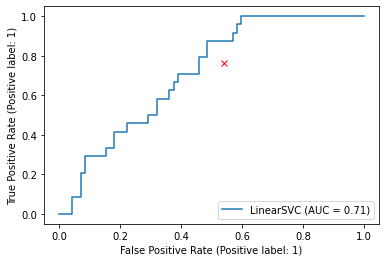

In [9]:
model = LinearSVC(random_state=17, C=3.5, max_iter=1e9)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print_metrics(y_test, y_pred, model, X_test)

accuracy = 0.7569444444444444 
TPR = 0.6666666666666666 
TNR = 0.8472222222222222 

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        72
           1       0.59      0.67      0.63        24

    accuracy                           0.80        96
   macro avg       0.74      0.76      0.75        96
weighted avg       0.81      0.80      0.81        96



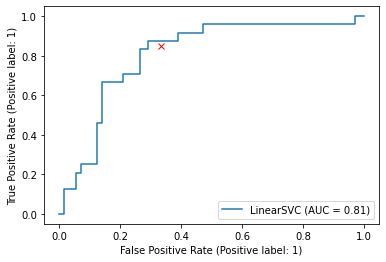

In [10]:
model = LinearSVC(random_state=17, C=3.5, max_iter=1e9)
x_train = data.loc[train_idx, genes].to_numpy()
x_test = data.loc[test_idx, genes].to_numpy()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print_metrics(y_test, y_pred, model, x_test)

# 5 

In [11]:
valid = data.loc[ann.loc[ann["Dataset type"] == "Validation"].index]
train = data.loc[ann.loc[ann["Dataset type"] == "Training"].index]

In [12]:
genes = []
for gene in data.columns:
    t = ttest_ind(valid[gene], train[gene])
    if t[1] < 0.05 and t[0] > 1:
        genes.append(gene)

print(genes)

['ABCA1', 'ABCD3', 'ABHD2', 'ACADM', 'ACKR1', 'ACRV1', 'ACSBG2', 'ACTA2', 'ACTL8', 'ACTR3', 'ACVR1', 'ADA2', 'ADAM11', 'ADAM21', 'ADAM22', 'ADAM23', 'ADAMTS2', 'ADGRA2', 'ADGRE5', 'ADGRG3', 'ADH6', 'ADNP', 'ADNP2', 'ADORA3', 'ADRA2A', 'ADRB2', 'ADTRP', 'AFF2', 'AGAP1', 'AGPAT1', 'AGPAT2', 'AGPAT3', 'AGPAT5', 'AHCYL2', 'AHNAK', 'AHNAK2', 'AHR', 'AKAP12', 'AKAP13', 'AKIP1', 'AKIRIN1', 'AKR1B1', 'AKR7A2', 'AKT3', 'ALDH6A1', 'ALDOA', 'ALG12', 'ALMS1', 'ALOX5', 'ALOX5AP', 'AMHR2', 'AMPH', 'ANAPC13', 'ANGPTL2', 'ANKRD17', 'ANO10', 'ANP32A', 'ANXA5', 'ANXA8L1', 'AP1AR', 'AP1S2', 'APAF1', 'APBA1', 'APH1B', 'APLP2', 'APOBEC2', 'APOBEC3G', 'APOC4-APOC2', 'APOE', 'APOL1', 'APOL3', 'APOL5', 'APOL6', 'APOM', 'AQP1', 'AQP9', 'ARF4', 'ARF6', 'ARG2', 'ARHGAP25', 'ARHGDIB', 'ARHGEF2', 'ARL2BP', 'ARL4C', 'ARMC1', 'ARPC4-TTLL3', 'ARPIN', 'ARRB2', 'ARSA', 'ASAP3', 'ASCL3', 'ASF1A', 'ASH1L', 'ASXL2', 'ATF1', 'ATF7IP', 'ATF7IP2', 'ATG101', 'ATG3', 'ATG7', 'ATM', 'ATP10B', 'ATP1B1', 'ATP2B1', 'ATP5MC2', 'ATP